# Преамбула
Экзамен состоит из трёх блоков:  
- программирование на python;  
- работа с датафреймами и описательная статистика;  
- классическое машинное обучение.

Стоимость вопроса равна одному баллу, если не сказано иное.  
Для успешной сдачи экзамена необходимо набрать 50% и более от максимального числа баллов.

- **NB:** В первом блоке (программирование на python) **ЗАПРЕЩЕНО** пользоваться библиотеками, не посталяемыми вместе с python по-умолчанию (т.е. pandas/numpy нельзя использовать в это блоке, а random/json -- можно);
- Во всех задачах на визуализацию **подписи, названия и легенду делать необязательно!**
- Все спорные моменты трактуются в пользу экзаменуемого;  
- Ваш код должен быть воспроизводим (если я положу исходные файлы в ту же папку, что и Ваш ноутбук, и нажму `Run` -> `Run All Cells`, то всё должно работать). Так что соблюдайте логику и последовательнось запуска ячеек. Спасибо :)  
- Можно пользоваться только своей головой, но любыми материалами и интернетом;  
- Если задание кажется сложным -- пропустите его;  

- Во время экзамена я буду отвечать только на вопросы касаемо формулировок заданий.

Главное, не спешите, проверяйте, что и куда записывается.  
За каждого болею.  
Всем удачи!  


<left>
    <img src="Data/pics/goodluck.gif"/>
</left>

## A. Базовый python
Для решения задач блока запрещено пользоваться библиотеками, не поставляемые вместе с python.  
Иными словами, всё, что устанавливается через `pip`, тут использовать нельзя.

### 1.
Аукцион — это торги, во время которых покупатели могут только повышать цену, которую они готовы заплатить за товар. В результате товар продается по максимально возможной цене.

В рекламных системах Яндекс и Google при выборе, какое объявление будет показано и насколько высоко, тоже используется аукцион. Но в этом аукционе мало предложить самую высокую цену, нужно учесть и другие факторы.
<a href="https://vc.ru/marketing/324617-chto-takoe-aukcion-v-kontekstnoy-reklame">©</a>

Рассмотрим VCG-аукцион для первой страницы поиска Яндекса и поисковых площадок РСЯ (рекламные сети Яндекса).  
Сначала рекламные объявления отбираются по качеству и соответсвию. Опустим этот момент. Далее объявления сортируются по ставке (сколько рекламодатель готов платить за каждый клик по его объявлению). Первые 4 будут показаны в выдаче. 
Предположим, что конкурируют 5 объявлений. Их ставки соответсвенно равны 1, 3, 4, 5, 10. Объявлене со ставкой 1 выбывает из игры.  

Распределение трафика и стоимост кликов следующие:
* все четыре объявления (4 места) получают 65% трафика и платят по 1 рубль за клик (ставка пятого места, которое не попало в выдачу);  
* первые 3 места получают ещё 10% трафика и за каждый клик из этих 10% платят по 3 рубля (ставка четвертого места);   
* первое и второе места по ставке получабт ещё 10% трафика и плата за клик составляет 4 рублей (ставка третьего места);  
* победитель по ставке получает ещё 15% трафика и платит за каждый клик из этого трафика 5 рублей (ставка второго места).  



\- гарантируется, что повторов нет (все ставки различны);  
\- гарантируется, что все ставки -- положительные числа.



#### 1.1
Напишите функцию `countTrafficMax`, которая принимает список из пяти чисел (ставки объявлений) и возвращает индекс максимальной ставки.

In [1]:
def countTrafficMax(bets: list) -> int:
    maxind = 0
    maxval = bets[0]
    for i, bet in enumerate(bets):
        if bet > maxval:
            maxval = bet
            maxind = i
    return maxind

In [2]:
assert countTrafficMax([1,2,3,4,5]) == 4

In [3]:
assert countTrafficMax([22, 34, 72, 64, 93]) == 4

In [4]:
assert countTrafficMax([76,  7, 60, 24, 51]) == 0

In [5]:
assert countTrafficMax([66,  7, 67, 24, 51]) == 2

#### 1.2 (2 балла)
Напишите функцию `countTraffic5`, которая принимает список из пяти чисел (ставки объявлений) и возвращает новый список, где на каждой соответствующей позиции записан объем трафика, который получит объявление.  

Например, если ставки были `[1,3,4,5,10]`, то функция должна вернуть список `[0, 65, 75, 85, 100]`.  

Числа в списке, который передаётся функции, могут быть неупорядочены, то есть функция, которой мы дадим список `[10, 1,3,4,5]` должна вернуть `[100, 0, 65, 75, 85]`.  

Список не имеет дубликатов.


In [6]:
def countTraffic5(bets: list) -> int:
    """
    Предлагаю следующую идею. У нас уже есть функция для нахождения инедкса максимального элемента.
    Давайте сделаем копию исходного списка. Найдем максимальный элемент. Запомним его (сохраним в другой список). И на его место поставим 0.
    Затем повторим процедуру с поиском максимума и его сохранение. Поскольку первый максимум в списке мы заменили на ноль, то найденный теперь максимум -- исходно второй максимум. 
    Таким же образом найдем 3й, 4й и 5й максимумы.
    """
    traffic = []
    bets_copy = bets[:]
    maximums = []
    
    for _ in range(5):
        maxValInd = countTrafficMax(bets_copy)
        maximums.append(bets[maxValInd])
        bets_copy[maxValInd] = 0
        
    for elem in bets:
        if elem == maximums[0]:
            traffic.append(100)
        elif elem == maximums[1]:
            traffic.append(85)
        elif elem == maximums[2]:
            traffic.append(75)
        elif elem == maximums[3]:
            traffic.append(65)
        else:
            traffic.append(0)
           
    return traffic

In [7]:
assert countTraffic5([1,2,3,4,5]) == [0, 65, 75, 85, 100]

In [8]:
assert countTraffic5([5,1,2,3,4]) == [100, 0, 65, 75, 85]

In [9]:
assert countTraffic5([5,1,3,4,2]) == [100, 0, 75, 85, 65]

In [10]:
assert countTraffic5([1,5,2,4,3]) == [0, 100, 65, 85, 75]

#### 1.3 (2 балла)
Напишите функцию `countTrafficN`, которая принимает список из неограниченного числа ставок и возвращает новый список, где на каждой соответствующей позиции записан объем трафика, который получит объявление.  

In [11]:
def countTrafficN(*args):
    """
    Ранее созданная функция умеет работать и для случая, отличного от пяти.
    Так что я просто создам новую функцию, которая принимаем какие-то аргументы в любом количестве, 
    передаёт их уже созданной функции и возвращает её результат.
    """
    return countTraffic5(*args)

In [12]:
assert countTrafficN([1,2,3,4,5]) == [0, 65, 75, 85, 100]
assert countTrafficN([1,5,2,4,3]) == [0, 100, 65, 85, 75]

In [13]:
assert countTrafficN([10,20,13,15,17, 1,2,3,4,5]) == [0, 100, 65, 75, 85, 0, 0, 0, 0, 0]

In [14]:
assert countTrafficN([ 1,2,10,20,13,15,17,3,4,5]) == [0, 0, 0, 100, 65, 75, 85,  0, 0, 0]

In [15]:
assert countTrafficN([ 1, 2, 10, 4, 20, 5, 13, 6, 15, 7, 17, 8, 9]) == [0, 0, 0, 0, 100, 0, 65, 0, 75, 0, 85, 0, 0]

### 2. (3 балла)
Дан файл `hw_25000.csv` с ростом (в дюймах) и весом (в фунтах) людей. 
Создайте новый файл `hw_25000_metric.csv`, где рост и вес будут записаны в сантимерах и килограммах соответственно. Округлите каждое значение до десятых.  

Считайте, что 1 дюйм равен 2.54 сантиметра, а фунт равен 453.6 грамма.

Примерный результат:<br>
<img src='Data/pics/task2.png' align='left'/>

In [16]:
def inch2m(inches):
    return round(inches * 2.54, 1)

def pound2kg(pounds):
    return round(pounds * 453.6 / 1000, 1)

with open('./Data/hw_25000.csv', 'r', encoding='utf8') as inpf:
    with open('hw_25000_metric.csv', 'w', encoding='utf8') as outf:
        
        outf.write("Index,Height(cm),Weight(kg)\n")
        inpf.readline()
        
        for line in inpf:
            index, h, w = line.strip().split(',')
            h = inch2m(float(h))
            w = pound2kg(float(w))
            outf.write("{},{},{}\n".format(index, h, w))

### 3. (4 балла)
Сотрудникам компании были выданы карточки для оплаты обедов в кафе на территории рабочего кампуса. Ваша задача -- написать класс для работы карточек.

Описание классовой структуры.

Есть класс карточки для оплаты обеда (`LunchCard`).  
Каждая карточка обладает следующими атрибутами:
* имя владельца (`name`);  
* баланс средств (`balance`).

По-умолчанию карточка создаётся с 50 у.е. на балансе.

У карточки должны быть реализованы методы:
* `eat_lunch`, который вычитает 2.6 у.е. из баланса, если это возможно, и возвращает баланс после совершения операции. Если покушать обед невозможно (недостаточно средств), то возвращается булевое `False`;
* `eat_special`, который уменьшает баланс на 4.6 у.е., а в остальном работает так же, как `eat_lunch`;
* `deposit_money`, который в качестве аргумента принимает число (сколько денег внести на баланс). Гарантируется, что метод принимает положительное число. После внесения средств метод возвращает текущий баланс.



In [17]:
class LunchCard:
    
    def __init__(self, name, balance=50):
        self.name = name
        self.balance = balance
    
    def eat_lunch(self):
        if self.balance >= 2.6:
            self.balance -= 2.6
            return self.balance
        return False
    
    def eat_special(self):
        if self.balance >= 4.6:
            self.balance -= 4.6
            return self.balance
        return False
    
    def deposit_money(self, m):
        self.balance += m
        return self.balance

In [18]:
LC = LunchCard('HOCK')
assert LC.name == 'HOCK'

In [19]:
assert LC.balance == 50

In [20]:
assert LC.eat_lunch() == 47.4

In [21]:
LC.eat_lunch()
LC.eat_special()
assert round(LC.balance,1) == 40.2

In [22]:
LC = LunchCard('HOCK', 4)
assert all([LC.name == 'HOCK', LC.balance == 4, LC.eat_lunch() == 1.4, not LC.eat_special()])

# B. Работа с табличными данными

В этом блоке мы поработает с <a href="https://finances.worldbank.org/Loans-and-Credits/IBRD-Statement-Of-Loans-Historical-Data/zucq-nrc3">историческими данными</a> о кредитах, выданных крылом <a href="https://www.vsemirnyjbank.org/ru/home">Всемирного Банка</a> IBRD (The International Bank for Reconstruction and Development).

In [23]:
# импорт необходимый библиотек
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# чтение файла (папка Data, файл world_bank_loans_historical_data.tsv )
df = pd.read_csv('./Data/world_bank_loans_historical_data.zip', sep='\t')
df.head(2)

,Loan Number,Region,Country Code,Country,Loan Type,Loan Status,Original Principal Amount,Interest Rate,First Repayment Date,Last Repayment Date
0,IBRD100,EUROPE AND CENTRAL ASIA,NL,Netherlands,NON POOL,Repaid,2000000.0,4.0,01/15/1949 12:00:00 AM,07/15/1958 12:00:00 AM
1,IBRD101,EUROPE AND CENTRAL ASIA,NL,Netherlands,NON POOL,Repaid,2000000.0,4.0,01/15/1949 12:00:00 AM,07/15/1958 12:00:00 AM


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Number                10127 non-null  object 
 1   Region                     10127 non-null  object 
 2   Country Code               10125 non-null  object 
 3   Country                    10127 non-null  object 
 4   Loan Type                  10127 non-null  object 
 5   Loan Status                10127 non-null  object 
 6   Original Principal Amount  10127 non-null  float64
 7   Interest Rate              10024 non-null  float64
 8   First Repayment Date       10080 non-null  object 
 9   Last Repayment Date        10081 non-null  object 
dtypes: float64(2), object(8)
memory usage: 791.3+ KB


### 4.
Проверьте, есть ли в таблице пропущенные значения.  
Если есть, то удалите строки с пропусками.

In [26]:
df.isna().sum()

Loan Number                    0
Region                         0
Country Code                   2
Country                        0
Loan Type                      0
Loan Status                    0
Original Principal Amount      0
Interest Rate                103
First Repayment Date          47
Last Repayment Date           46
dtype: int64

In [27]:
df = df.dropna()
df.isna().sum()

Loan Number                  0
Region                       0
Country Code                 0
Country                      0
Loan Type                    0
Loan Status                  0
Original Principal Amount    0
Interest Rate                0
First Repayment Date         0
Last Repayment Date          0
dtype: int64

In [28]:
df.shape

(10018, 10)

### 5.
Посчитайте медианные значения для размера кредита (`Original Principal Amount`) и процентной ставки (`Interest Rate`)

In [29]:
df[['Original Principal Amount', 'Interest Rate']].median()

Original Principal Amount    32000000.00
Interest Rate                       5.31
dtype: float64

### 6. 
Выведите строки из датафрейма для топ-5 самых больших кредитов.

In [30]:
df.nlargest(n=5, columns='Original Principal Amount')

,Loan Number,Region,Country Code,Country,Loan Type,Loan Status,Original Principal Amount,Interest Rate,First Repayment Date,Last Repayment Date
8369,IBRD78620,EASTERN AND SOUTHERN AFRICA,ZA,South Africa,FSL,Repaying,3.750000e+09,0.00,05/01/2017 12:00:00 AM,05/01/2038 12:00:00 AM
6910,IBRD42670,EAST ASIA AND PACIFIC,KR,"Korea, Republic of",SCL,Fully Repaid,3.000000e+09,3.06,09/15/2003 12:00:00 AM,03/15/2008 12:00:00 AM
7053,IBRD44050,LATIN AMERICA AND CARIBBEAN,AR,Argentina,SCL,Fully Repaid,2.525250e+09,5.24,04/15/2002 12:00:00 AM,10/15/2003 12:00:00 AM
8197,IBRD76810,EUROPE AND CENTRAL ASIA,KZ,Kazakhstan,FSL,Disbursing&Repaying,2.125000e+09,0.00,05/15/2014 12:00:00 AM,11/15/2033 12:00:00 AM
6948,IBRD43020,EAST ASIA AND PACIFIC,KR,"Korea, Republic of",SCL,Fully Repaid,2.000000e+09,1.27,11/15/2003 12:00:00 AM,05/15/2013 12:00:00 AM


### 7.

#### 7.1 (1.5 балла)
Для каждого региона (`Region`) посчитайте:
* число кредитов;  
* медианный размер кредита;  
* среднюю процентную ставку.  

In [31]:
df.groupby('Region').agg({'Original Principal Amount': [pd.Series.count, 'median'], 
                          'Interest Rate': ['mean']})

Original Principal Amount               \
                                                 count       median   
Region                                                                
AFRICA                                             188   8098150.00   
EAST ASIA AND PACIFIC                             2129  40000000.00   
EASTERN AND SOUTHERN AFRICA                        395  12400000.00   
EUROPE AND CENTRAL ASIA                           1957  36400000.00   
LATIN AMERICA AND CARIBBEAN                       3158  30000000.00   
MIDDLE EAST AND NORTH AFRICA                      1167  33000000.00   
SOUTH ASIA                                         631  90000000.00   
WESTERN AND CENTRAL AFRICA                         393  16603879.63   

                             Interest Rate  
                                      mean  
Region                                      
AFRICA                            6.290559  
EAST ASIA AND PACIFIC             4.604279  
EASTERN AND SOUTHERN AFRICA       5.286165  
EUROPE AND CENTRAL ASIA           3.643641  
LATIN AMERICA AND CARIBBEAN       4.160743  
MIDDLE EAST AND NORTH AFRICA      4.151825  
SOUTH ASIA                        3.342821  
WESTERN AND CENTRAL AFRICA        6.160522

#### 7.2 (2 балла)
Для каждого региона определите топ-3 страны по суммарному размеру кредитов.

In [32]:
# вот так без rank
df.groupby(['Region', 'Country'])['Original Principal Amount'].sum().groupby('Region').nlargest(3).reset_index(allow_duplicates=True).iloc[:,1:]

,Region,Country,Original Principal Amount
0,AFRICA,Nigeria,5.674000e+08
1,AFRICA,Zambia,3.593000e+08
2,AFRICA,South Africa,2.418000e+08
3,EAST ASIA AND PACIFIC,Indonesia,6.431575e+10
4,EAST ASIA AND PACIFIC,China,5.798170e+10
5,EAST ASIA AND PACIFIC,Philippines,2.877748e+10
6,EASTERN AND SOUTHERN AFRICA,Angola,5.907000e+09
7,EASTERN AND SOUTHERN AFRICA,South Africa,5.815300e+09
8,EASTERN AND SOUTHERN AFRICA,Kenya,2.486215e+09
9,EUROPE AND CENTRAL ASIA,Turkiye,5.047677e+10


In [33]:
# вот так с rank
tmp = df.groupby(['Region', 'Country'])['Original Principal Amount'].sum().reset_index()
tmp.head()

,Region,Country,Original Principal Amount
0,AFRICA,Botswana,37500000.0
1,AFRICA,Burundi,4800000.0
2,AFRICA,Cameroon,75400000.0
3,AFRICA,"Congo, Democratic Republic of",120000000.0
4,AFRICA,"Congo, Republic of",30000000.0


In [34]:
tmp['rank'] = tmp.groupby('Region')['Original Principal Amount'].rank(ascending=False)

In [35]:
tmp[tmp['rank'] <= 3].sort_values(by=['Region', 'rank'])

,Region,Country,Original Principal Amount,rank
16,AFRICA,Nigeria,5.674000e+08,1.0
25,AFRICA,Zambia,3.593000e+08,2.0
19,AFRICA,South Africa,2.418000e+08,3.0
30,EAST ASIA AND PACIFIC,Indonesia,6.431575e+10,1.0
28,EAST ASIA AND PACIFIC,China,5.798170e+10,2.0
38,EAST ASIA AND PACIFIC,Philippines,2.877748e+10,3.0
44,EASTERN AND SOUTHERN AFRICA,Angola,5.907000e+09,1.0
57,EASTERN AND SOUTHERN AFRICA,South Africa,5.815300e+09,2.0
51,EASTERN AND SOUTHERN AFRICA,Kenya,2.486215e+09,3.0
105,EUROPE AND CENTRAL ASIA,Turkiye,5.047677e+10,1.0


### 8.

#### 8.1
Посчитайте, сколько было выдано кредитов размером больше 1 млрд. условных единиц.

In [36]:
(df['Original Principal Amount'] > 1e9).sum()

40

#### 8.2
Посчитайте, сколько было выдано кредитов следующих размеров (*возможно, стоит создать новый столбец, где будет написано, в какую категорию попадает кредит*):  
* до 100 млн;  
* от 100 до 200 млн;  
* от 200 до 500 млн;
* от 500 до 1000 млн;  
* от 1 млрд.

In [37]:
(
    pd.cut(df['Original Principal Amount'] / 1e6,
           bins = [np.min(df['Original Principal Amount'] / 1e6), 
                   100, 200, 500, 1000, 
                   np.max(df['Original Principal Amount'] / 1e6)]
          )
    .value_counts()
)

Original Principal Amount
(0.0, 100.0]        7522
(100.0, 200.0]      1108
(200.0, 500.0]       907
(500.0, 1000.0]      152
(1000.0, 3750.0]      40
Name: count, dtype: int64

#### 8.3
На частотной гистограмме изобразите, сколько кредитов попало в каждый бин (группу) из пункта 8.2

<Axes: xlabel='Original Principal Amount'>

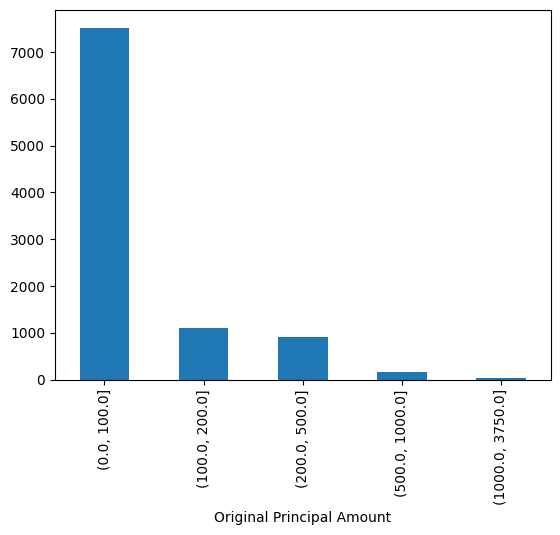

In [38]:
(
    pd.cut(df['Original Principal Amount'] / 1e6,
           bins = [np.min(df['Original Principal Amount'] / 1e6), 
                   100, 200, 500, 1000, 
                   np.max(df['Original Principal Amount'] / 1e6)]
          )
    .value_counts()
).plot.bar()

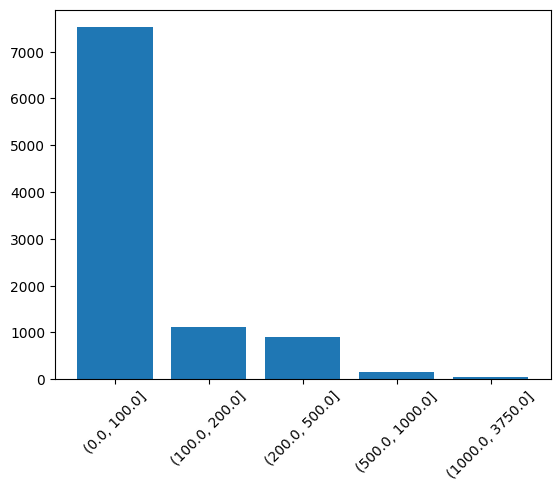

In [39]:
# или так
tmp = (
    pd.cut(df['Original Principal Amount'] / 1e6,
           bins = [np.min(df['Original Principal Amount'] / 1e6), 
                   100, 200, 500, 1000, 
                   np.max(df['Original Principal Amount'] / 1e6)]
          )
    .value_counts()
)

plt.bar(x=tmp.index.astype(str), height=tmp.values)
plt.xticks(rotation=45)
plt.show()

### 9.
К сожалению, pandas автоматически не распарсил дату. Давайте исправим это.

#### 9.1
Создайте новый столбец `lastPaymentYear`, где будет содержаться год последнего платежа по кредиту (год из `Last Repayment Date`).

In [40]:
df['lastPaymentYear'] = pd.to_datetime(df['Last Repayment Date'])

C:\Users\igumn\AppData\Local\Temp\ipykernel_8048\769127784.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['lastPaymentYear'] = pd.to_datetime(df['Last Repayment Date'])


#### 9.2
Посчитайте, сколько "закрывающих" платежей было в каждый год (т.е. просто сколько последних платежей было сделано в каждом году).

In [41]:
df.lastPaymentYear.dt.year.value_counts().sort_index()

lastPaymentYear
1951     6
1954     2
1955     2
1956     4
1957     4
        ..
2054    21
2055    13
2056     4
2057     9
2058     4
Name: count, Length: 106, dtype: int64

#### 9.3
Нарисуйте диаграмму рассеяния (scatter plot) зависимости числа последних платежей от года. То есть по иксу -- год последнего платежа, по игреку -- число последних платежей по кредитам в этот год.

<Axes: xlabel='lastPaymentYear', ylabel='count'>

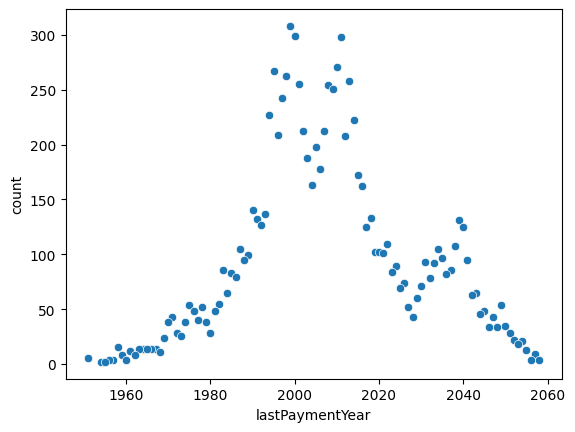

In [42]:
sns.scatterplot(data=df.lastPaymentYear.dt.year.value_counts())

### 10.
Нарисуйте диаграмму рассения (scatter plot) зависимости размера кредита **в миллионах** от процентной ставки.

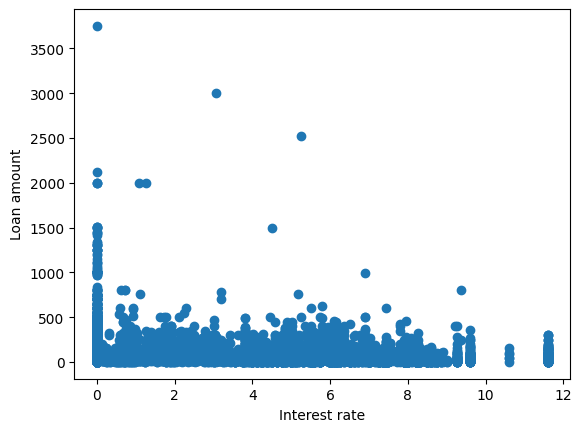

In [43]:
plt.scatter(x=df['Interest Rate'], y=df['Original Principal Amount'] / 1e6)
plt.xlabel('Interest rate')
plt.ylabel('Loan amount')
plt.show()

### 11.
Нарисуйте боксплот для распределения **логарифмированных** размеров кредитов отдельно для каждого региона.

C:\Users\igumn\miniforge3\envs\hock\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


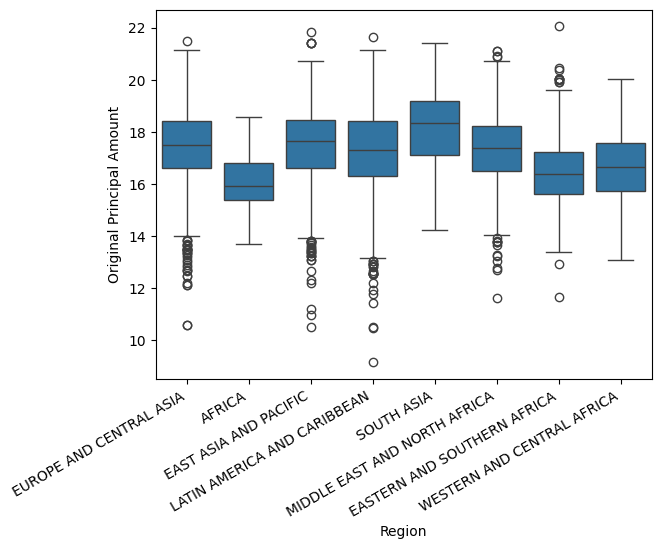

In [44]:
sns.boxplot(data=df, x='Region', y=np.log(df['Original Principal Amount']))
plt.xticks(rotation=30, ha='right')
plt.show()

### 12.
Получите сводную таблицу, где в столбцах -- страны, в строках -- тип кредита (Loan Type), в пересечении -- сумма кредитов (в млн) для этой страны для этого типа кредита. Если для данной страны не выдавались кредиты такого типа, то в ячейке датафрейма должен быть ноль (не `NaN`).

In [45]:
df

,Loan Number,Region,Country Code,Country,Loan Type,Loan Status,Original Principal Amount,Interest Rate,First Repayment Date,Last Repayment Date,lastPaymentYear
0,IBRD100,EUROPE AND CENTRAL ASIA,NL,Netherlands,NON POOL,Repaid,2000000.0,4.00,01/15/1949 12:00:00 AM,07/15/1958 12:00:00 AM,1958-07-15
1,IBRD101,EUROPE AND CENTRAL ASIA,NL,Netherlands,NON POOL,Repaid,2000000.0,4.00,01/15/1949 12:00:00 AM,07/15/1958 12:00:00 AM,1958-07-15
2,IBRD70,EUROPE AND CENTRAL ASIA,NL,Netherlands,NON POOL,Repaid,2000000.0,4.00,01/15/1949 12:00:00 AM,07/15/1958 12:00:00 AM,1958-07-15
3,IBRD71,EUROPE AND CENTRAL ASIA,NL,Netherlands,NON POOL,Repaid,2000000.0,4.00,01/15/1949 12:00:00 AM,07/15/1958 12:00:00 AM,1958-07-15
4,IBRD80,EUROPE AND CENTRAL ASIA,NL,Netherlands,NON POOL,Repaid,2000000.0,4.00,01/15/1949 12:00:00 AM,07/15/1958 12:00:00 AM,1958-07-15
...,...,...,...,...,...,...,...,...,...,...,...
10122,IBRDS0160,MIDDLE EAST AND NORTH AFRICA,DZ,Algeria,NPL,Fully Cancelled,20000000.0,0.00,05/15/1984 12:00:00 AM,11/15/1989 12:00:00 AM,1989-11-15
10123,IBRDS0170,MIDDLE EAST AND NORTH AFRICA,DZ,Algeria,NPL,Fully Repaid,5000000.0,7.95,11/15/1983 12:00:00 AM,11/15/1989 12:00:00 AM,1989-11-15
10124,IBRDS0180,MIDDLE EAST AND NORTH AFRICA,MA,Morocco,NPL,Fully Repaid,50000000.0,8.25,11/01/1984 12:00:00 AM,05/01/1997 12:00:00 AM,1997-05-01
10125,IBRDS0190,LATIN AMERICA AND CARIBBEAN,PE,Peru,NPL,Fully Repaid,5000000.0,8.25,12/15/1984 12:00:00 AM,12/15/1990 12:00:00 AM,1990-12-15


In [46]:
df.pivot_table(columns='Country', 
               index='Loan Type', 
               values='Original Principal Amount',
               aggfunc='sum', fill_value=0) / 1e6

Country,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,"Bahamas, The",...,Uganda,Ukraine,Uruguay,Uzbekistan,"Venezuela, Republica Bolivariana de",Vietnam,Western and Central Africa,"Yugoslavia, former",Zambia,Zimbabwe
Loan Type,,,,,,,,,,,,,,,,,,,,,
CPL,0.00,1806.079372,0.0,0.0,3544.566162,12.0,0.00,0.000000,0.0,32.8,...,0.0000,1018.410000,435.743907,252.00,1034.913295,0.00,21.1,989.894835,81.414024,896.2
FSL,1681.90,353.330000,5907.0,12.0,21989.260000,1212.9,0.00,0.000000,3479.3,100.0,...,0.0000,13144.271577,3127.760000,3676.29,30.300000,3457.79,0.0,0.000000,0.000000,0.0
NON POOL,0.00,262.500000,0.0,0.0,532.300000,0.0,417.73,106.336429,0.0,0.0,...,43.1997,0.000000,155.200000,0.00,383.300000,0.00,0.0,403.700000,359.300000,43.1
NPL,0.00,1201.000000,0.0,0.0,1140.300000,0.0,417.73,106.336429,0.0,10.0,...,43.1997,0.000000,341.400000,0.00,383.300000,0.00,72.5,636.048776,522.650000,43.1
POOL LOAN,0.00,0.000000,0.0,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0,...,0.0000,0.000000,0.000000,0.00,0.000000,0.00,0.0,0.000000,0.000000,0.0
SCL,45.56,611.763408,0.0,0.0,9754.205998,0.0,0.00,0.000000,0.0,0.0,...,0.0000,4294.217000,590.842457,302.14,687.199435,0.00,0.0,0.000000,0.000000,0.0
SCPD,0.00,1919.657220,0.0,0.0,4358.320840,0.0,0.00,0.000000,0.0,0.0,...,0.0000,0.000000,386.613636,0.00,1192.687271,0.00,0.0,0.000000,31.285976,0.0
SCPM,0.00,0.000000,0.0,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0,...,0.0000,0.000000,0.000000,0.00,0.000000,0.00,0.0,0.000000,0.000000,0.0
SCPY,0.00,0.000000,0.0,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0,...,0.0000,0.000000,0.000000,0.00,0.000000,0.00,0.0,0.000000,0.000000,0.0


## C. Классическое машинное обучение
Попробуем научиться различать нормалньые купюры от поддельных по фотографиям.  
Для получения признаков из фотографий было использовано <a href="https://habr.com/ru/articles/449646/">вейвлет-преобразование</a> (можете потом почитать, если интересно, что это).

В итоге были получены четыре признака:  

1. variance of Wavelet Transformed image (continuous)  

2. skewness of Wavelet Transformed image (continuous)  

3. curtosis of Wavelet Transformed image (continuous)  

4. entropy of image (continuous)  


Данные находятся в `./Data/data_banknote_authentication_with_noise.txt`. В качестве разделителя использована запятая. Пропусков и дубликатов нет. Метка класса 0 -- нормальная купюра, 1 -- поддельная.

In [47]:
df = pd.read_csv("./Data/data_banknote_authentication_exam.zip", sep=',')
df.head()

,variance,skewness,curtosis,entropy,class
0,6.611742,10.974778,1.535766,4.122100,0
1,5.343440,9.996715,4.679038,0.840204,0
2,3.957577,3.074500,2.933947,-1.290739,0
3,5.682487,2.956399,-6.785953,-5.281263,0
4,-1.209253,0.116037,4.247728,-5.225711,0


### 13.
Прочитайте данные. Постройте боксплот для каждого признака на одной картинке отдельно для каждого класса.

#### 13.1
Для этого данные нужно сначала привести к длинному (long) формату.

In [48]:
dflong = df.melt(id_vars='class')
dflong.head()

,class,variable,value
0,0,variance,6.611742
1,0,variance,5.343440
2,0,variance,3.957577
3,0,variance,5.682487
4,0,variance,-1.209253


#### 13.2
А теперь уже нарисуем картинку, использовав только что созданную длинную табличку.

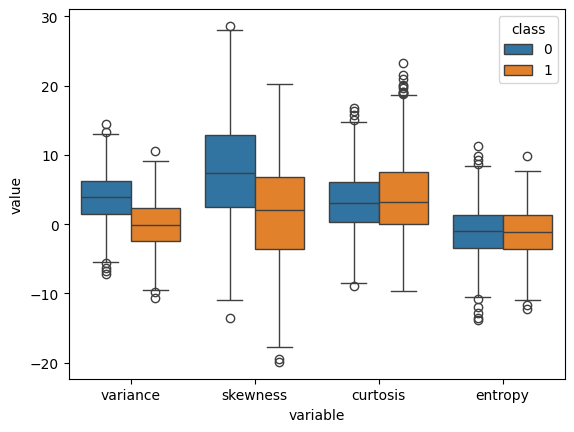

In [49]:
sns.boxplot(data=dflong, x='variable', y='value', hue='class')
plt.show()

#### 14.
Попробуем обучить бинарный классификатор. В качестве модели будем использовать обычную логистическую регрессию.

#### 14.1 (5 баллов)
* Разделите данные на трейн и тест с использованием стратификации по классу. Для тестирования используйте 25% данных. Сид для случайной генерации 29072023.
* Если посмотреть описательные статистики с помощью метода `describe`, то мы увидим, что все признаки в одном масштабе. Это же можно было понять и по картинке из пункта 13.2.  
Тем не менее, **давайте проведем стандартизацию данных**, чтобы однозначно быть уверенными в одинаковм масштабе, а также для корректного интерпретирования коэффициентов в уравнении регрессии.
* Обучите модель логистической регрессии с параметрами по-умолчанию.  
* Посчитайе метрику F1 для предсказания модели на тестовых данных.
* Посмотрите значения коэффициентов в уравнении лог.регрессии (атрибут `coef_`). Что можно сказать о влиянии каждого признака в предсказание?  


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], 
                                                    random_state=29072023, test_size=0.25,
                                                    stratify=df['class'])

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [54]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.7457627118644068

In [55]:
model.coef_

array([[-1.41248573, -1.18012455, -0.54727456, -0.11994562]])

Первые три признака вносят похожий вклад в предсказание модели. Мы можем так интепретировать коэффициенты, потому что признаки точно в одном масштабе, мы их прошкалировали.  
Что можно дальше сказать про коэффициенты? Целевой класс, фальшивая купюра, -- это лейбл 1. Чем больше сырое значение, которое выдаёт линейная модель, тем больше вероятность, что это целевой класс. Все признаки после стандартизации у нас имеют среднее ноль. Получается, что модель выдаёт положительные сырые значения тогда, когда признаки имеют отирцательные, то есть меньше среднего. 

То есть, если значение признака меньше среднего (отрицательное после стандартизации), то это вносит вклад в сторону единички (фальшивки), а если значение признака больше среднего, то это тогда вносит вклад уже в сторону нолика (нормально купюры). Вот мы и узнали больше о том, как работает наш классификатор, и получили возможные инсайты об устройстве данных.

#### 14.2
Предположим, что мы выпускает програмное обеспечение для банкоматов, которое должно определять по данным со сканера внутри банкомата, вставлена ли нормальная купюра или фальшивая. При этом нам не так страшно не принять нормальную купюру, как принять фальшивую.  
В качестве нулевой гипотезы давайте считать, что купюра нормальная. Какую ошибку мы тогда хотим минимизировать? Первого рода или второго?

Мы боимся не задетектировать фальшивку. То есть боимся ложноотрицательных результатов (боимся пропустить беременность, если она есть). Тогда мы хотим минимизировать ошибку второго рода. Это равносильно максимизации метрики Recall (полнота, т.е. какую долю из всех фальшивых купюр нам удалось опознать). При этом и про точность не хотим до конца забывать.

Давайте использовать метрику $F_{\beta}$. Посчитайте качество предсказания модели с помощью $F_\beta$, сделав Recall в пять раз важнее, чем Precision.  

*Можете отдельно посчитать полноту и точность и убедиться, что $F_\beta$ стала "ближе" к полноте, чем $F_1$.

In [56]:
from sklearn.metrics import fbeta_score
fbeta_score(y_test, y_pred, beta=5)

0.7209478195109654

#### 14.3 (4 балла)
Логистическая регрессия продуцирует нам вероятности принадлежности целевому классу. По-умолчанию, чтобы считать, что объект целевому классу принадлежит, порог равен 0.5, или 50%. Давайте переберем все пороги с шагом 0.05 (от 0 до 1) и определим оптимальные порог по метрике $F_\beta$ (полнота в пять раз важнее точности). 

* Получите вероятности, а не метки классов;  
* Для каждого порога от 0 до 1, включая концы, определите метки классов и посчитайте $F_\beta$;  
* Постройте график зависимости метрики от порога (диаграмму рассеяния, scatter plot);
* Определите оптимальное значение порога (можно просто на глаз).

In [57]:
# более понятный вариант

In [58]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
thresholds = np.arange(0, 1.01, 0.05)

In [59]:
fbetas = []
for thr in thresholds:
    y_pred = (y_pred_prob > thr) #.astype(int)
    fbetas.append(fbeta_score(y_test, y_pred, beta=5))

In [60]:
fbetas

[0.9544145873320538,
 0.9606375271673508,
 0.9549987837509122,
 0.9476516634050881,
 0.9442944785276074,
 0.923304562268804,
 0.9072011878247959,
 0.8545816733067729,
 0.8001000750562922,
 0.7700803212851406,
 0.7209478195109654,
 0.6644736842105263,
 0.6273812547625095,
 0.5760122230710466,
 0.5377936670071501,
 0.4991041719989762,
 0.4141829393627955,
 0.28888888888888886,
 0.17544770308850247,
 0.09479166666666666,
 0.0]

Лучший порог 0.05 | Лучшая метрика 0.9606375271673508


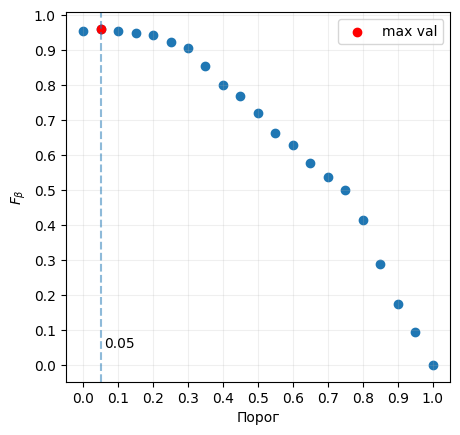

In [61]:
maxi = np.argmax(fbetas)
plt.scatter(np.arange(0, 1.01, 0.05), fbetas)
plt.scatter(np.arange(0, 1.01, 0.05)[maxi], fbetas[maxi], c='red', label='max val')
print('Лучший порог', np.arange(0, 1.01, 0.05)[maxi], '| Лучшая метрика', fbetas[maxi])

plt.axvline(0.05, linestyle='--', alpha=0.5)
plt.text(0.06, 0.05, 0.05)

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Порог')
plt.ylabel(r'$F_\beta$')

plt.axis('scaled')

plt.grid(alpha=0.2)
plt.legend()

plt.show()

<left>
    <img src="Data/pics/cat.gif"/>
</left>